# matplotlib编程模式

## matplotlib的可视化结构
```
Figure的对象与构造
    FigureManager
        |-Figure
            |-Axes
                |-Artist
                    |-Line2D
                    |-Patch
                    |-Legend
                    |-Text
                    |-_BaseImage
                    |-Table
                    |-OffsetBox
                    |-AnnotationBbox
                    |-Collection
                    |-QuiverKey
```




- 说明：
    - 一般matplotlib使用FigureManager管理过个Figure（图表），这个对象我们一般不直接使用；
        - 直接调用全局函数可以
    - 每个Figure由一个或者多个坐标系Axes构成；
        - 每个坐标系由两个两个坐标轴构成
        - 坐标轴上面包含坐标刻度等
    - 在坐标系中提供绘制，每个被绘制的对象为Artist
        - Artist分成很多类型，形成丰富的图表元素。
- 例子
    - 注意：如果想在IPYTHON中直接显示图像，需要使用魔法指令
        - `% matplotlib inline`

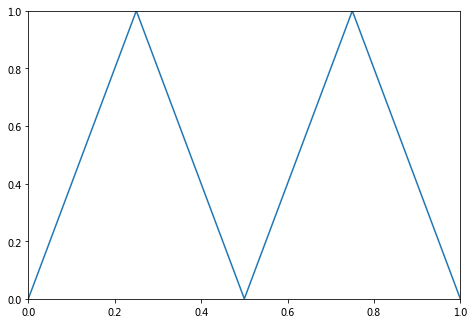

In [2]:
% matplotlib inline
# coding=utf-8
import matplotlib.pyplot as plt
# --------------------------
# Figure:Figure不建议使用构造器构造，而是使用pyplot提供的函数构造
figure = plt.figure('窗体标题')

# --------------------------
# 坐标轴
ax = plt.Axes(
    figure,    # 坐标轴所在图形
    [0, 0, 1, 1])  # 坐标的区域

# --------------------------
# 图形
line = plt.Line2D(
    [0, 0.25, 0.5, 0.75, 1],     # 线条的所有点的X坐标
    [0, 1, 0, 1, 0])     # 线条的所有点的Y坐标

# --------------------------
# Figure，Axes，Artist的容器关系
ax.add_artist(line)
figure.add_axes(ax)

# --------------------------
# 显示图形
figure.show(warn=False)
# 显式窗体
plt.show()


## Axes提供直接绘制功能

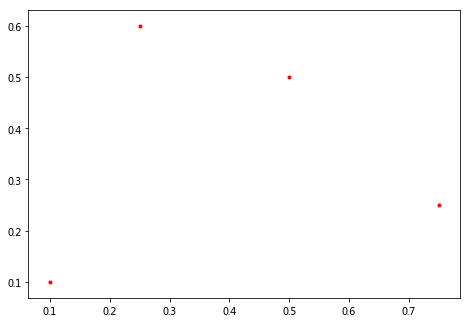

In [6]:
% matplotlib inline
# coding=utf-8
import matplotlib.pyplot as plt
# --------------------------
# Figure:Figure不建议使用构造器构造，而是使用pyplot提供的函数构造
figure = plt.figure('窗体标题')

# --------------------------
# 坐标轴
ax = plt.Axes(
    figure,    # 坐标轴所在图形
    [0, 0, 1, 1])  # 坐标的区域

# --------------------------
# 直接使用Axes提供的绘制函数
ax.scatter(x=[0.1, 0.25, 0.5, 0.75], y=[0.1, 0.6, 0.5, 0.25], color='r', marker='.')

figure.add_axes(ax)

# --------------------------
# 显示图形
figure.show(warn=False)
# 显式窗体
plt.show()



## 绘制散点图

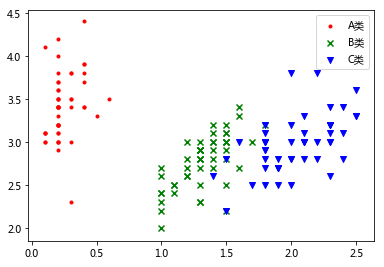

In [7]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


data,target=datasets.load_iris(return_X_y=True)

figure = plt.figure('机器学习可视化',figsize=(6,4))
ax = figure.add_axes([0.1, 0.1, 0.8, 0.8], label='鸢尾花数据集')

# 切换特征维度观察数据的线性可分性
ax.scatter(x=data[0:50:,3], y=data[0:50,1],color='r',label='A类',marker='.')
ax.scatter(x=data[50:100,3], y=data[50:100,1],color='g',label='B类',marker='x' )
ax.scatter(x=data[100:150,3], y=data[100:150,1],color='b',label='C类',marker='v' )
ax.legend()  # 显示摘要
plt.show()

# Figure的使用


## 构造Figure对象

1. 构造器定义

```python
       class matplotlib.figure.Figure(
           figsize=None, 
           dpi=None, 
           facecolor=None, 
           edgecolor=None, 
           linewidth=0.0, 
           frameon=None, 
           subplotpars=None, 
           tight_layout=None, 
           constrained_layout=None)
```
2. 构造器参数说明

    - |-figsize : 2元小数元组: rcParams["figure.figsize"]
        - |-英寸为单位的元组表示(width, height).
    - |-dpi : float: rcParams["figure.dpi"]
        - |-每英寸的点数（像素）
    - |-facecolor : 字符与4元元组: rcParams["figure.facecolor"]
        - |-设置的是Figure的patch(小区域块)的填充颜色facecolor.
    - |-edgecolor : 字符与4元元组: rcParams["figure.edgecolor"]
        - |-设置的是Figure的patch(小区域块)的边界颜色edgecolor.
    - |-linewidth : float
        - |-边框的线条宽度.
    - |-frameon : bool: rcParams["figure.frameon"]
        - |-True就绘制边框.
    - |-subplotpars : SubplotParams：rcParams["figure.subplot.*"]
        - |-Subplot子图的参数.
    - |-tight_layout : bool或者字典: rcParams["figure.autolayout"]
        - |-If False 就使用subplotpars. 
        - |-If True 使用缺省的padding实现tight_layout. 
        - |-字典：使用key参数：pad, w_pad, h_pad, and rect实现tight_layout.
    - |-constrained_layout : bool：rcParams["figure.constrained_layout.use"]
        - |-True：实现 constrained layout. 与tight_layout类似,但比tight_layout灵活.
        - |-该参数对subplot()与 subplot2grid()无效.

## Figure对象的属性与数据访问

### 属性

- 上面的参数只有三个提供属性模式访问
    - |-number
    - |-dpi
    - |-frameon

### 数据访问

- Figure的属性都提供set/get函数设置与获取
    - set_xxxx(value)
    - value=get_xxxx()
    - |-get_dpi()
        - |-set_dpi(val)
    - |-get_edgecolor()
        - |-set_edgecolor(color)
    - |-get_facecolor()
        - |-set_facecolor(color)
    - |-get_figheight()
        - |-set_figheight(val, forward=True)  
            - |-#forward用来控制：当设置尺寸过大，窗体是否自动调整大小。
    - |-get_figwidth()
        - |-set_figwidth(val, forward=True)
            - |-#forward用来控制：当设置尺寸过大，窗体是否自动调整大小。
    - |-get_size_inches()
        - |-set_size_inches(w, h=None, forward=True)
            - |-#forward用来控制：当设置尺寸过大，窗体是否自动调整大小。
    - |-get_frameon()
        - |-set_frameon(b)
    - |-get_tight_layout()
        - |-set_tight_layout(tight)
    - |-get_constrained_layout()
        - |-set_constrained_layout(constrained)
    - |-get_constrained_layout_pads(relative=False）
        -  |-set_constrained_layout_pads(\*\*kwargs)

### Figure参数的rcParams设置：

- Figure的参数还可以通过`matplotlib.rcParams['xxxx']`来设置



## 使用figure函数创建Figure对象

1. 函数定义如下

```python
    matplotlib.pyplot.figure(
        num=None, 
        figsize=None, 
        dpi=None, 
        facecolor=None, 
        edgecolor=None, 
        frameon=True, 
        FigureClass=<class 'matplotlib.figure.Figure'>, 
        clear=False, **kwargs)
```

2. 函数的参数说明：
    - |- num : 整数或者字符串: None
        - |-Figure的内部标示ID，如果是字符串也会作为窗体标题
        - |-如果没有设置num，或者是整数，figure的ID会自动按序生成。
    - |- figsize : 2元小数元组: `rcParams["figure.figsize"] = [6.4, 4.8]`
        - |-窗体大小(英寸为单位)
    - |- dpi : 整数类型: `rcParams["figure.dpi"] = 100`
        - |-分辨率，每英寸的像素个数
    - |- facecolor :字符串或者4元元组: `rcParams["figure.facecolor"] = 'w'`
        - |-Figure的主体颜色
    - |- edgecolor :字符串或者4元元组: `rcParams["figure.edgecolor"] = 'w'`
        - |-Figure的边界颜色
    - |- frameon : `bool:True`
        - |-是否绘制Frame边框
   -  |- FigureClass : `Figure子类：Figure`
        - |-一般指定figure函数创建Figure对象的类（必须是Figure的子类），默认是Figure
    - |- clear : `bool: False`
        - |-如果num指定的Figure存在，则清除。
        

## 把Figure保存成图像

- 可以使用savefig把Figure保存成图片
    - |- `savefig(fname, *, frameon=None, transparent=None, **kwargs)`

## Figure与FigureManager

- 注意：
    - 除了在构造器外，Figure没有提供title，linewidth的设置方式
    - 阅读源代码知道，对窗体标题的处理有下面代码完成
        - |-figManager.set_window_title(figLabel)
        - |-figManager.canvas.figure.set_label(figLabel)  #这个是Figure的标签,来自Artist类
    - 获取figmanager可以使用pyplot函数实现
        - FigureManager=plt.get_current_fig_manager()
            - |-返回对象类型：NSWindow
        - 如果不存在Figure，会自动返回，plt.figure一般会创建一个新的。所以该函数最好在Figure创建后调用


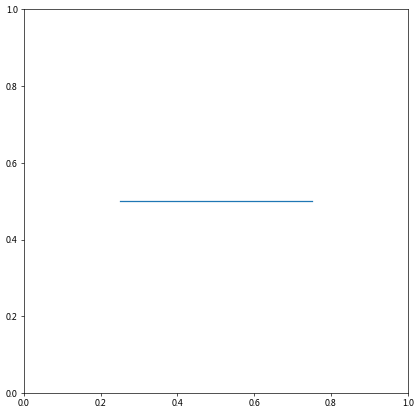

In [8]:
% matplotlib inline
# coding=utf-8
import matplotlib.pyplot as plt


# ---------------------------------------------
# Figure
figure = plt.figure(
    num='Figure使用与管理',     # 窗体ID，字符串也是窗体标题
    figsize=(6.4, 4.8),  # 窗体大小（英寸）
    dpi=150,    # 分辨率
    facecolor=(1, 0, 0, 1),   # 填充色
    edgecolor='b',  # 边界色
    frameon=True,   # 是否绘制边框
    linewidth=5     # 来自Figure构造器的绘制变量的线条宽度
)
FigureManager = plt.get_current_fig_manager()
FigureManager.set_window_title('换一个窗体标题')
# 当坐标轴填满Figure,上面的某些属性看不见效果，比如facecolor与edgecolor，linewidth
# 属性方式访问
figure.dpi = 50
figure.frameon = False
figure.number = 2
# set/get方式访问
figure.set_dpi(60)
figure.set_figheight(8)
figure.set_size_inches(8, 8)
# ---------------------------------------------
# 坐标轴
ax = plt.Axes(
    figure,    # 坐标轴所在图形
    [0.1, 0.1, 0.8, 0.8])  # 坐标的区域
# 图形
line = plt.Line2D(
    [0.25, 0.5, 0.75],     # 线条的所有点的X坐标
    [0.5, 0.5, 0.5])     # 线条的所有点的Y坐标

# Figure，Axes，Artist的容器关系
ax.add_artist(line)
figure.add_axes(ax)
# 显示图形
figure.show(warn=False)
# 显式窗体
plt.show()


# Axes坐标系

- Axes坐标轴的使用与管理 ---- 之理解型add_axes
    - 坐标轴通常包含Axis, Tick, Line2D, Text, Polygon等对象绘制完成,
    - 坐标轴的创建提供了两种方式：
        - |-`Figure.add_axes(*args, **kwargs)  [理解型]`
        - |-`add_subplot(*args, **kwargs)        [快捷性]`

## add_axes创建坐标系

- add_axes函数使用的两种方式：
    - |-`add_axes(rect, projection=None, polar=False, **kwargs)`
        - |-`[add_axes函数利用参数构造Axes对象]`
    - |-add_axes(ax) 
        - |-`[调用者自己构造Axes对象]`

- 上面两种方式本质都一样，因为参数都是一样的。

### 创建Axes对象

- Axes类型定义

```python
    .class matplotlib.axes.Axes(fig, rect, facecolor=None, frameon=True, sharex=None, sharey=None, label='', xscale=None, yscale=None, **kwargs)
```

- 参数说明：
    - |-fig : Figure
        - |-坐标轴所属的Figure.
    - |-rect : [left, bottom, width, height]
        - |-坐标轴在Figure中的位置与大小
    - |-facecolor: 字符串与四元元组：None
        - |-周坐标轴填充色
    - |-frameon：bool：True
        - |-是否绘制坐标轴边框
    - |-sharex：Axes：None
        - |-使用sharex指定的坐标轴的属性
    - |-sharey：Axes：None
        - |-使用sharey指定的坐标轴的属性
    - |-label：：''
        - |-坐标轴的标签
    - |-xscale：字符串：None
        - |-x坐标比例尺的计算方式
        - |-取值：{"linear", "log", "symlog", "logit", ...}
    - |-yscale：字符串：None
        - |-y坐标比例尺的计算方式
        - |-取值：{"linear", "log", "symlog", "logit", ...}
    
- 还有其他属性可以在这儿使用。请参考官方文档。

### 使用add_axes直接创建

- 函数定义：
```python

add_axes(rect, projection=None, polar=False, **kwargs)

```

- 参数说明：
    - |-rect : 四元元组或者列表
        - |-坐标轴位置与大小
    - |-projection : {None, 'aitoff', 'hammer', 'lambert', 'mollweide', 'polar', 'rectilinear', str},
        - |-坐标轴的类型
    - |-polar : boolean
        - |-使用极坐标，取值True等价于projection='polar'.
    - |-sharex, sharey : Axes
        - |-使用sharey指定的坐标轴的属性
    - |-label : str
        - |-坐标轴标签
    
    还有其他属性可以在这儿使用。请参考官方文档。

### Axes使用例子

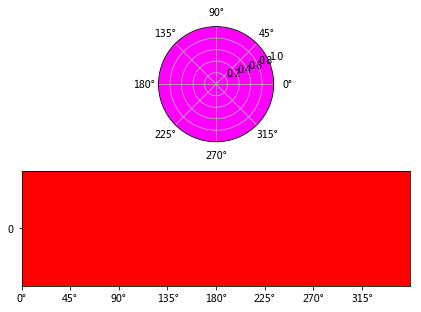

In [10]:
% matplotlib inline
# coding=utf-8
import matplotlib.pyplot as plt

figure = plt.figure(num='Axes坐标轴的使用与管理')
# ---------------------------------------------
# 坐标轴
ax1 = plt.Axes(
    fig=figure,
    rect=[0.05, 0.05, 0.9, 0.4],
    facecolor=(1, 0, 0, 1),
    frameon=True,
    label='坐标轴Axes对象',
    xscale='linear',
    yscale='symlog'
)
figure.add_axes(ax1)
figure.add_axes(
    [0.05, 0.55, 0.9, 0.4],  # 位置与大小，必须第一个指定，不能使用形式参数
    projection='polar',      # 坐标轴类型
    sharex=ax1,              # 共享ax1中的xaxis
    # sharey=ax1,            # 共享ax1中的yaxis
    label='函数构造的坐标轴Axes',
    facecolor=(1, 0, 1, 1),     # 还可以使用其他属性
    frameon=True,
)
# ---------------------------------------------
# 图形
line = plt.Line2D(
    [0.25, 0.5, 0.75],     # 线条的所有点的X坐标
    [0.5, 0.5, 0.5])     # 线条的所有点的Y坐标

# Figure，Axes，Artist的容器关系
ax1.add_artist(line)

# 显示图形
figure.show(warn=False)

# 保存
figure.savefig('a.png')
# 显式窗体
plt.show()


## add_subplot创建坐标系

1. 函数定义：

```python
    add_subplot(*args, **kwargs)
```

2. 该函数的所有属性基本上与add_axes一样。可以创建axes，并指定位置，在坐标轴在figure中均匀分配，一共有三种使用方法
    - |-`add_subplot(nrows, ncols, index, **kwargs)`
        - |-nrows，坐标轴的行数（多个坐标轴）
        - |-ncols，坐标轴的列数（多个坐标轴）
        - |-index，坐标轴的位置（位置按照自然数计算，行：按照从上到下，列：按照从左到右）
        - |- `**kwargs 与add_axes函数中参数一样，可以求助于文档`
    - |-`add_subplot(pos, **kwargs)`
        - |-与上一种方法一样，只是当nrows，ncols， index不超过1位数的时候，可以合并成pos来表示
    - |-`add_subplot(ax)  `   
        - |-与add_axes一样  

3. 例子代码

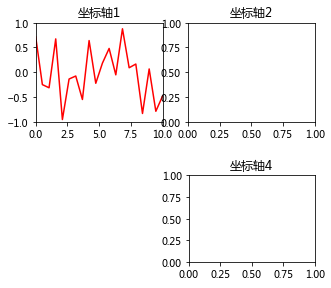

In [11]:
% matplotlib inline
# coding=utf-8
import matplotlib.pyplot as plt

figure = plt.figure('Figure的坐标轴管理', (5, 4))
# ------------------------------------------
ax1 = figure.add_subplot(221, title='坐标轴1')
ax2 = figure.add_subplot(2, 2, 2, title='坐标轴2')
ax3 = figure.add_subplot(224, title='坐标轴4', position=[0.55, 0.05, 0.35, 0.3])

ax1.set_xbound(lower=0, upper=10)
ax1.set_ybound(lower=-1, upper=1)
line = plt.Line2D(
    xdata=np.linspace(0, 10, 20),
    ydata=np.random.uniform(-1, 1, size=20),
    label='Line2',
    color=(1, 0, 0, 1)
)
ax1.add_line(line)
# 下面代码报错，多个坐标轴，不能公用一个Line2D对象
# ax2.add_line(line)
# ax3.add_line(line)
# ------------------------------------------
plt.show()